# <b>Question 3</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

## <b>Part 1.1</b>

(303, 384, 3)
(303, 384)


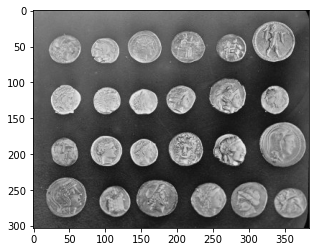

In [2]:
coins = cv2.imread("../images/coins.png")
coins = cv2.cvtColor(coins,cv2.COLOR_BGR2RGB)
coinsG = cv2.cvtColor(coins,cv2.COLOR_RGB2GRAY)
print(coins.shape)
print(coinsG.shape)
plt.imshow(coinsG,cmap='gray')

In [3]:
def thresholding(img,t):
    out = img.copy()
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if out[i][j] < t:
                out[i][j] = 0
            else:
                out[i][j] = 255
    return out

In [4]:
out13 = thresholding(coinsG,134)

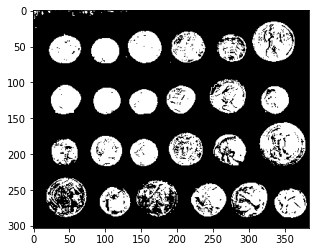

In [5]:
plt.imshow(out13,cmap='gray')

In [6]:
def padding(pic,k):
    #Padding
    #Number of row/columns needed for padding is floor(k/2)
    padNum = math.floor(k/2)
#     print(padNum)
    # 2k extra rows and columns are needed to accomodate both sides
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
#     print(padPic.shape)
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    # Image will start from (padNum,padNum)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(pic.shape)
    padPic[xStart:xEnd, yStart:yEnd] = pic
#     plt.imshow(padPic,cmap='gray')
    return padPic


In [52]:
def dilate(img,k):
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k,k),dtype='uint8')
    #Min Filter
#     print(k)
#     print(padNum)
#     print(StructE)
#     print(padPic)
#     plt.imshow(padPic,cmap='gray')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-padNum:i+padNum+1,j-padNum:j+padNum+1]
            vals = vals*StructE
            out[i,j] = np.max(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

In [53]:
def erode(img,k):
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k,k),dtype='uint8')
    #Max Filter
#     print(k)
#     print(padNum)
#     print(StructE)
#     print(padPic)
#     plt.imshow(padPic,cmap='gray')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-padNum:i+padNum+1,j-padNum:j+padNum+1]
            vals = vals*StructE
            out[i,j] = np.min(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out

In [9]:
def drawHistogram(img):
    his = np.zeros(256,)
    a = img.flatten()
    for i in a:
        his[i] = his[i]+1
    return his

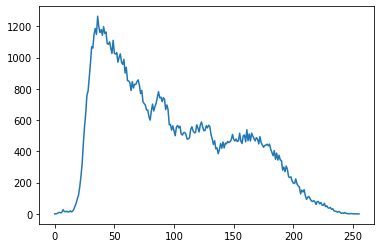

In [10]:
histg = drawHistogram(coinsG)
# show the plotting graph of an image
plt.plot(histg)
plt.show()
# print(histg)

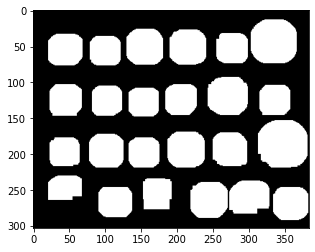

In [11]:
d = erode(out13,5)
e = dilate(d,5)
e = dilate(e,5)
e = dilate(e,5)
e = dilate(e,5)
e = dilate(e,5)
d = erode(e,5)
d = erode(d,5)
d = erode(d,5)
d = erode(d,3)
d = erode(d,5)
d = erode(d,5)
d = erode(d,3)
plt.imshow(d,cmap='gray')

In [12]:
def findRoot(ar, unionIt):
    if unionIt[ar] == ar:
        return ar
    else:
        unionIt[ar] = findRoot(unionIt[ar], unionIt)
        return unionIt[ar]
    
def unionSet(ar1, ar2, unionIt):
    val1 = findRoot(ar1,unionIt)
    val2 = findRoot(ar2,unionIt)
    minVal = min(val1,val2)
    maxVal = max(val1,val2)
    unionIt[maxVal] = minVal
    
def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = findRoot(labels[row, column], linked)
    return labels


In [14]:
out = connComponents(d)

In [16]:
uC, cC = np.unique(out, return_counts=True)
print("Number of coins = ",len(uC[uC!=0]))

Number of coins =  24


## <b>Part 1.2</b>

In [17]:
def otsuT(img):
    listThem = img.flatten()
    minT = np.min(img)
    maxT = np.max(img)
    minV = -10
    minTh = -10
    listColors = np.arange(minT+0.5,maxT-0.5,0.5)
    for i in listColors:
        foreG = listThem[listThem >= i]
        vF = np.var(foreG)
        
        backG = listThem[listThem < i]
        vB = np.var(backG)
        
        sigmaF = vF*(len(foreG)/len(listThem)) + vB*(len(backG)/len(listThem))
        if sigmaF < minV or minV == -10:
            minV = sigmaF
            minTh = i
    return minTh.astype('uint8')

In [18]:
otsuThreshold = otsuT(coinsG)
img = thresholding(coinsG,otsuThreshold)
print(otsuThreshold)

107


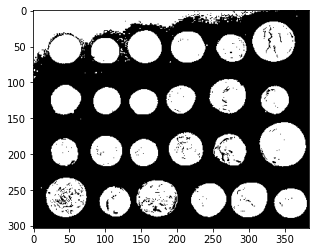

In [19]:
plt.imshow(img,cmap='gray')

In [20]:
out = connComponents(img)
uC, cC = np.unique(out, return_counts=True)
print("Number of coins = ",len(uC[uC!=0]))
# print(restored_unique[restored_unique!=0])

Number of coins =  98


On comparing both, otsu doesnt preduct correctly due to the addiional noise. But on normal thresholding and applying morphological operations, we can we get a perfect out. So this proves otsu isnt the most optimal one

## <b>Part2</b>

In [21]:
## 3x3 Filters
#Sobel filter
MxS = [[-1,0,1],
       [-2,0,2],
       [-1,0,1]]
MyS = [[1,2,1],
       [0,0,0],
       [-1,-2,-1]]
#Laplacian filter
ML1 = [[0,1,0],
       [1,-4,1],
       [0,1,0]]
MxS = np.array(MxS)
MyS = np.array(MyS)
ML1 = np.array(ML1)

In [22]:
img=coinsG.copy()

In [23]:
def filt(img,ker,k):
    r = img.shape[0]
    c = img.shape[1]
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    padNum = k//2
    xS = padNum
    xE = imgP.shape[0] - padNum
    yS = padNum
    yE = imgP.shape[1] - padNum
    for i in range(xS,xE):
        for j in range(yS,yE):
            KxS = i - padNum
            KxE = i + padNum
            KyS = j - padNum
            KyE = j + padNum
            imgK = imgP[KxS:KxE+1,KyS:KyE+1]
            val = sum(sum(imgK*ker))
            out[i,j] = max(0,val)
    out = out[xS:xE,yS:yE]
    return out.astype(np.int)

In [77]:
SobelX = filt(img,MxS,3)
SobelY = filt(img,MyS,3)
Sobel = np.sqrt(SobelX**2 + SobelY**2)
Laplacian = filt(img,ML1,3)

### <b> Laplacian</b>

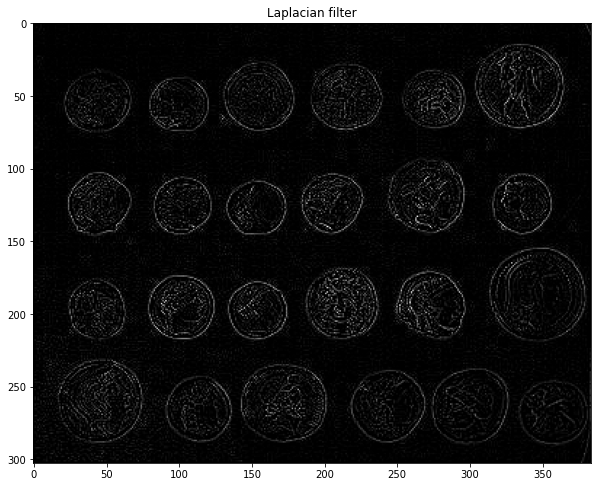

In [48]:
fig, axs = plt.subplots(1, 1,figsize=(10,10))
axs.imshow(Laplacian,cmap='gray')
axs.title.set_text('Laplacian filter')

In [49]:
otsuThreshold = otsuT(Laplacian)
LapImg = thresholding(Laplacian,otsuThreshold)
print(otsuThreshold)

48


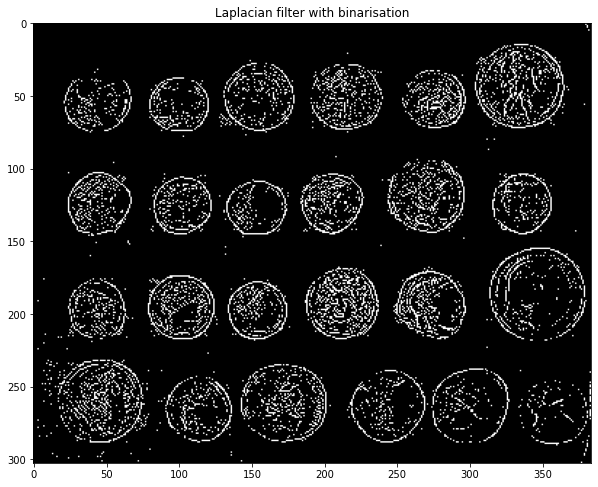

In [50]:
fig, axs = plt.subplots(1, 1,figsize=(10,10))
axs.imshow(LapImg,cmap='gray')
axs.title.set_text('Laplacian filter with binarisation')

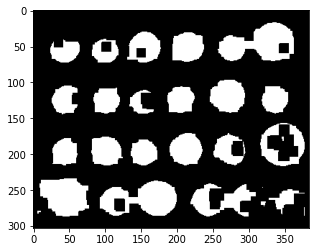

In [57]:
qq = dilate(LapImg,5)
qq = dilate(qq,5)
# qq = erode(qq,7)
# qq = erode(qq,3)
qq = erode(qq,7)
qq = erode(qq,7)
plt.imshow(qq,cmap='gray')

In [58]:
out = connComponents(qq)
# print(out)
uC, cC = np.unique(out, return_counts=True)
print("Number of coins for laplacian= ",len(uC[uC!=0]))

Number of coins for laplacian=  26


### <b> Sobel</b>

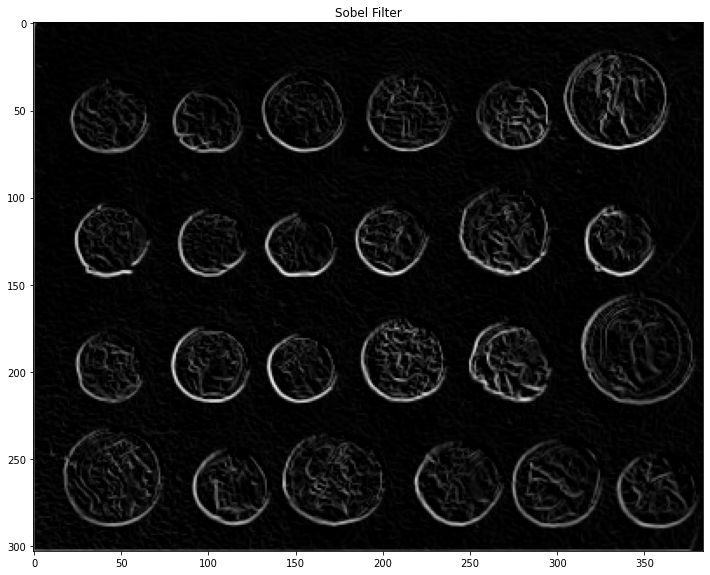

In [79]:
fig, axs = plt.subplots(1, 1,figsize=(12,12))
axs.imshow(Sobel,cmap='gray')
axs.title.set_text('Sobel Filter')

171


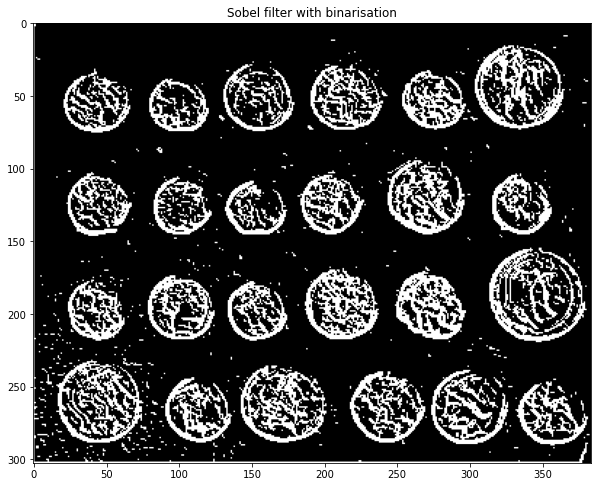

In [85]:
otsuThreshold = otsuT(Sobel)
SobImg = thresholding(Sobel,50)
print(otsuThreshold)
fig, axs = plt.subplots(1, 1,figsize=(10,10))
axs.imshow(SobImg,cmap='gray')
axs.title.set_text('Sobel filter with binarisation')

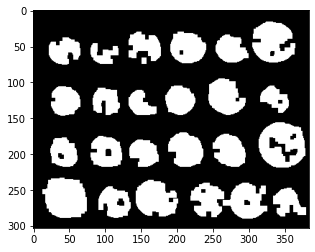

In [89]:

qq = dilate(SobImg,5)
qq = erode(qq,5)
qq = erode(qq,7)
qq = dilate(qq,7)
plt.imshow(qq,cmap='gray')

In [90]:
out = connComponents(qq)
uC, cC = np.unique(out, return_counts=True)
print("Number of coins for sobel= ",len(uC[uC!=0]))

Number of coins for sobel=  25


### <b> Canny</b>

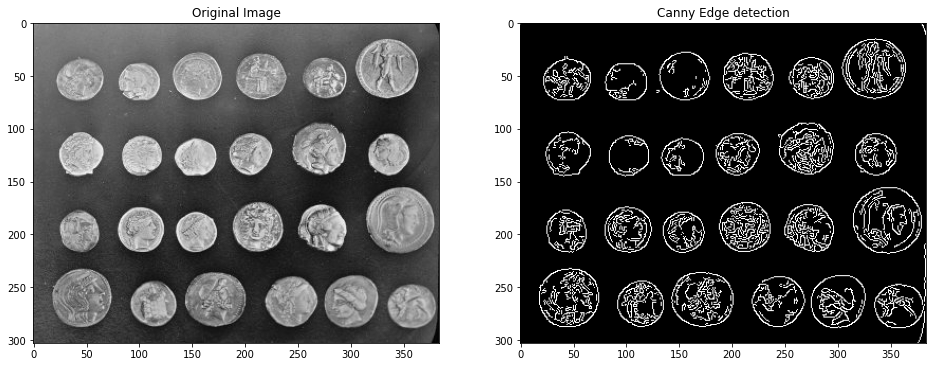

In [112]:
cannyGirl = cv2.Canny(img, 90, 255)
fig, axs = plt.subplots(1, 2,figsize=(16,16))
axs[0].imshow(img, cmap='gray')
axs[0].title.set_text('Original Image')
axs[1].imshow(cannyGirl, cmap='gray')
axs[1].title.set_text('Canny Edge detection')

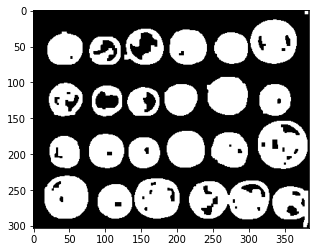

In [117]:

qq = dilate(cannyGirl,7)
qq = erode(qq,3)
qq = erode(qq,5)
qq = dilate(qq,5)
# qq = dilate(qq,3)
plt.imshow(qq,cmap='gray')

In [118]:
out = connComponents(qq)
uC, cC = np.unique(out, return_counts=True)
print("Number of coins for canny= ",len(uC[uC!=0]))

Number of coins for canny=  24


Observations: <br>
On manual threshold we get good results when combined with dilation and erosion in comparison to otSU threshold which doesnt perceive contours and only looks at the frequency. Otsu gave abnormally high count due to this
<br>
Using edge based detection methods, we can get pretty decent results where Laplacian performs very poorly. It predicts more than the actual number of coins. <br>
Using canny we get 1 more coin than actual due to the extra dilation. But sobel despite not being able to cover entire coin,it is able to segment them properly<br>